<a href="https://colab.research.google.com/github/sayantan16/Deep-Learning-Sample-Images/blob/main/02_Neural_Network_Classification_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with tensorflow

A classification problem is where it is tried to be classified to be one thing or another

A few types of classification problem:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check out the features

X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the labels

y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

### Lets visualize the data

In [ ]:
import pandas as pd

circles = pd.DataFrame({"X0" : X[:, 0], "X1": X[:, 1], "label" : y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


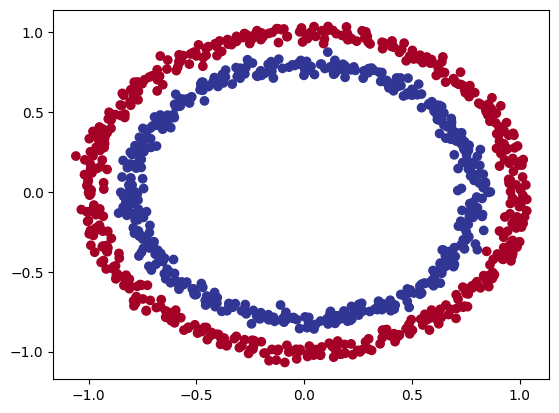

In [ ]:
# Visualize with a plot

import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [ ]:
# Check the shapes of our features and labels

X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples are we working with

len(X), len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labels

X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with tensorflow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...


In [ ]:
# Set the random seed
import tensorflow as tf
tf.random.set_seed(42)

# Create the model using sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 5s 3ms/step - loss: 4.0025 - accuracy: 0.4740
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 5.7259 - accuracy: 0.4350
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 5.6440 - accuracy: 0.4480
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 5.5162 - accuracy: 0.4390
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 5.4155 - accuracy: 0.4480


In [ ]:
# Improving the model by training it for longer

model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [ ]:
# Improving the model by adding another layer and train

# Set the random seed
import tensorflow as tf
tf.random.set_seed(42)

# Create the model using sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [ ]:
# Evaluating the model

model_2.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.5000


[0.6946314573287964, 0.5]

In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving the Model

In [ ]:
# Set the random seed
import tensorflow as tf
tf.random.set_seed(42)

# Create the model using sequential API
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

# Fit the model
model_3.fit(X, y, epochs=300, verbose=0)

In [ ]:
# Evaluate the model

model_3.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5520


[0.6932418942451477, 0.5519999861717224]

In [ ]:
# Plotting the predictions against the actual data

import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by model predicting on X
  """

  # Define the axis boundary of the plot and create a MeshGrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values
  x_in = np.c_[xx.ravel(), yy.ravel()]    # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # we have to reshape the prediction to plot
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


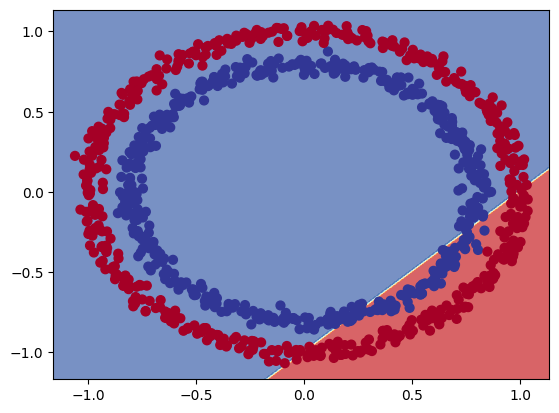

In [ ]:
# Checking the predictions our model is making

plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [ ]:
# Checking if the model can be used for regression problem

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Splitting the regression data into Training and Test data

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [ ]:
# Model based on regression problem
# Set the random seed
import tensorflow as tf
tf.random.set_seed(42)

# Create the model using sequential API
model_4 = tf.keras.Sequential([
    # tf.keras.layers.Dense(100, input_shape=(None, 1)), # <- define input_shape here
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                metrics=["mae"])

# Fit our model to the regression data
model_4.fit(tf.expand_dims(X_reg_train, axis=-1), # <- expand input dimensions
            y_reg_train,
            epochs=200, verbose=0)

2/2 [==============================] - 0s 6ms/step


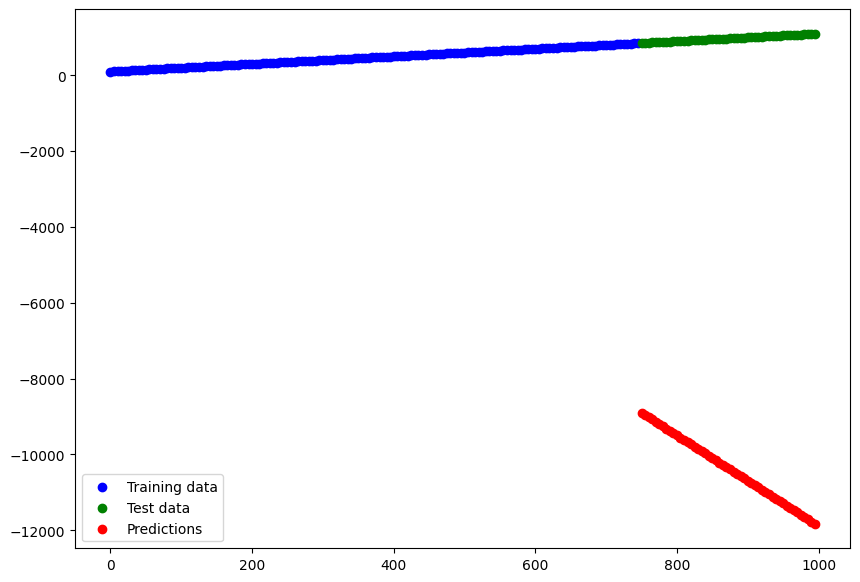

In [ ]:
# Make predictions with our trained model

y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's prediction against the regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

# **Introduction to Non-Linearity**

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.3360 - accuracy: 0.4500
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2619 - accuracy: 0.4550
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2249 - accuracy: 0.4540
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1871 - accuracy: 0.4540
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1268 - accuracy: 0.4530
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0997 - accuracy: 0.4580
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 4.0906 - accuracy: 0.4580
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0897 - accuracy: 0.4570
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0891 - accuracy: 0.4570
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0885 - accuracy: 0.4570
Epoch 11/

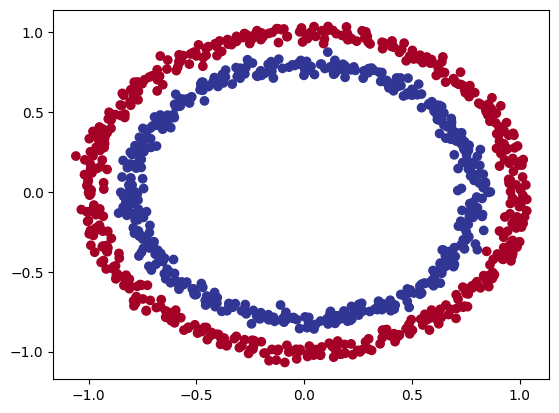

In [ ]:
# Check our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 2ms/step
doing binary classification


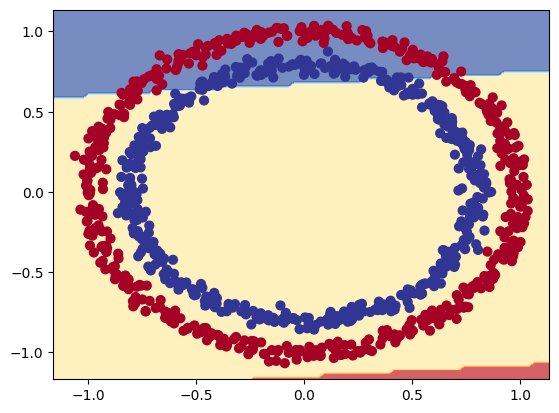

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_5, X=X, y=y)

First model with non-linear activation function

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.3131 - accuracy: 0.4640
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2586 - accuracy: 0.4670
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2212 - accuracy: 0.4680
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2152 - accuracy: 0.4680
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1799 - accuracy: 0.4660
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1587 - accuracy: 0.4650
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0629 - accuracy: 0.4660
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9974 - accuracy: 0.4700
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9956 - accuracy: 0.4710
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9947 - accuracy: 0.4710
Epoch 11/

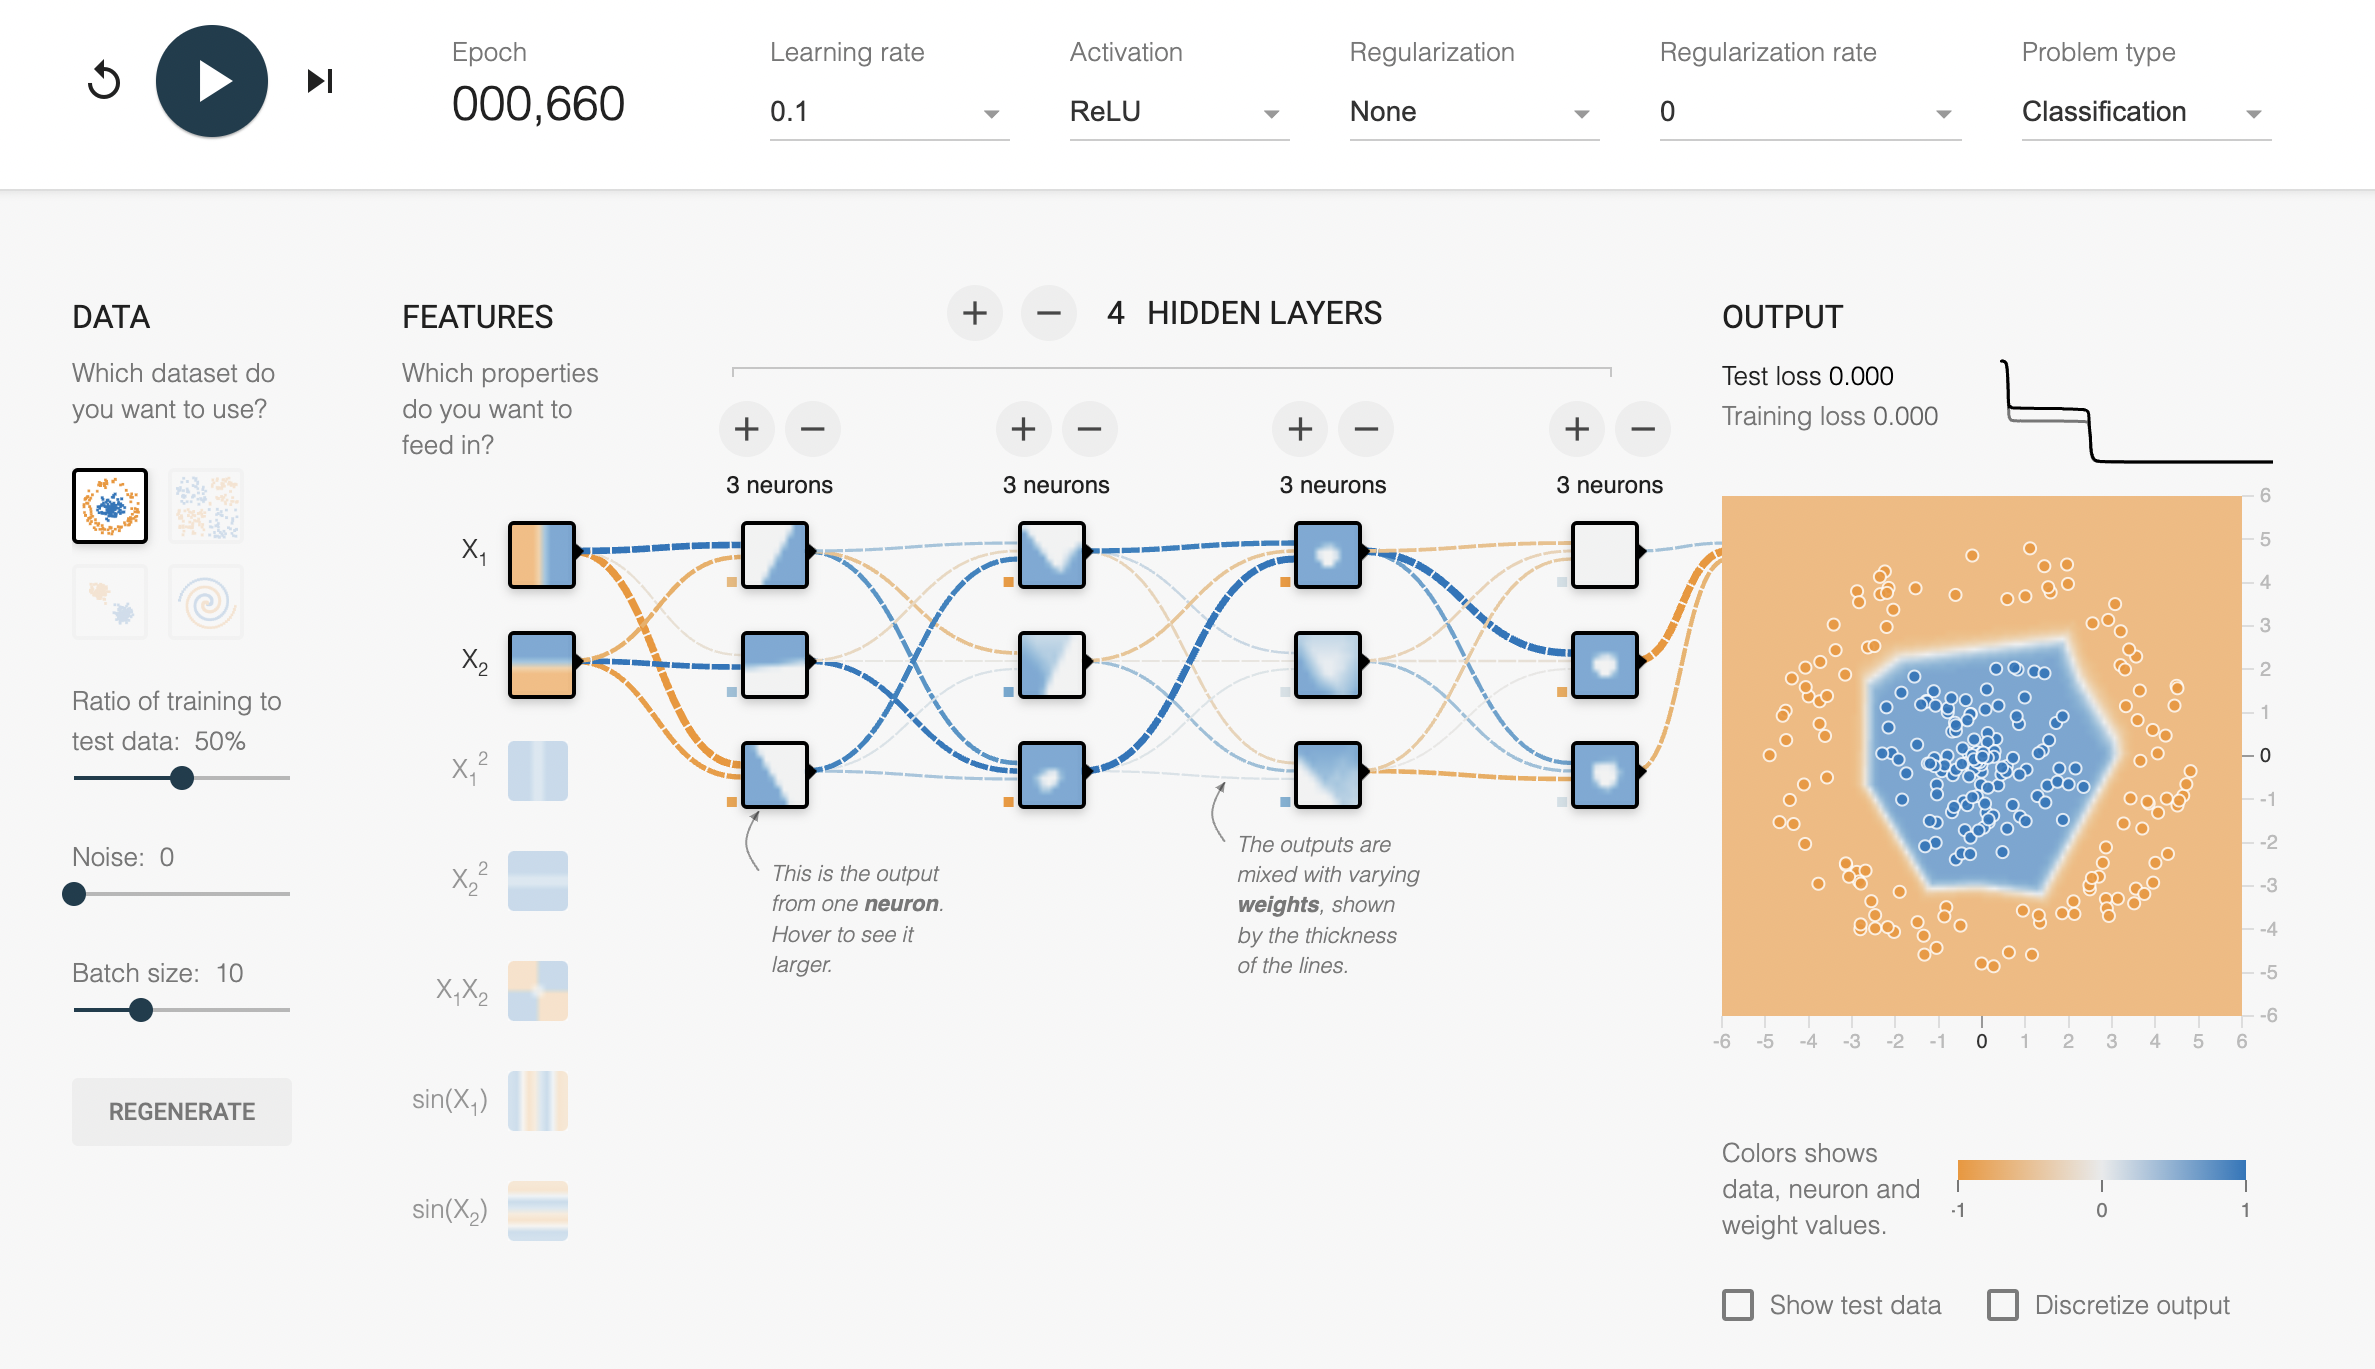

In [ ]:
# Trying to Replicating the multilayer neural network from TensorFlow payground

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation="relu"),
    tf.keras.layers.Dense(3, activation="relu"),
    tf.keras.layers.Dense(3, activation="relu"),
    tf.keras.layers.Dense(3, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(X, y, epochs=50)

Epoch 1/50
32/32 [==============================] - 2s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/50
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/50
32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/50
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/50
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/50
32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/50
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/50
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/50
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/50
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/50
32/32 [

In [ ]:
# Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 1s 2ms/step
doing binary classification


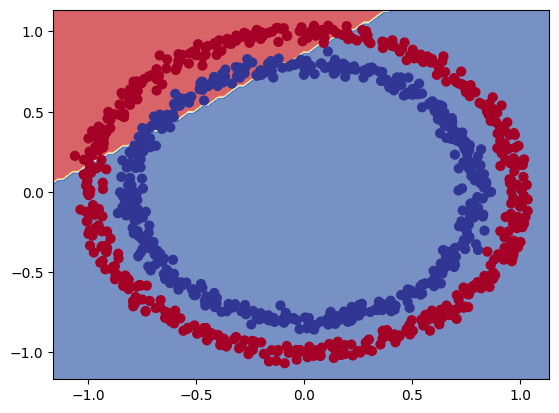

In [ ]:
# How do our model predictions look

plot_decision_boundary(model=model_7,
                       X=X,
                       y=y)

In [ ]:
# Trying to replicate using Sigmoid Activation in the Output layer

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 0.6972 - accuracy: 0.4980
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6881 - accuracy: 0.4980
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6856 - accuracy: 0.5080
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6833 - accuracy: 0.5150
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6805 - accuracy: 0.5300
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6776 - accuracy: 0.5890
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6751 - accuracy: 0.5830
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6718 - accuracy: 0.5850
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6686 - accuracy: 0.5720
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classification


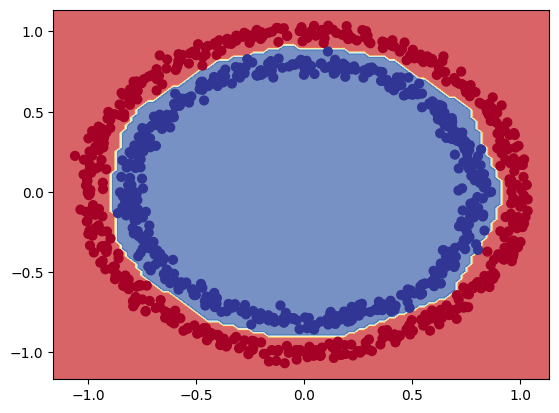

In [ ]:
# How do our model predictions look

plot_decision_boundary(model=model_8,
                       X=X,
                       y=y)

In [ ]:
# Create a Toy Tensor (similar to the data we pass into our models)

A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

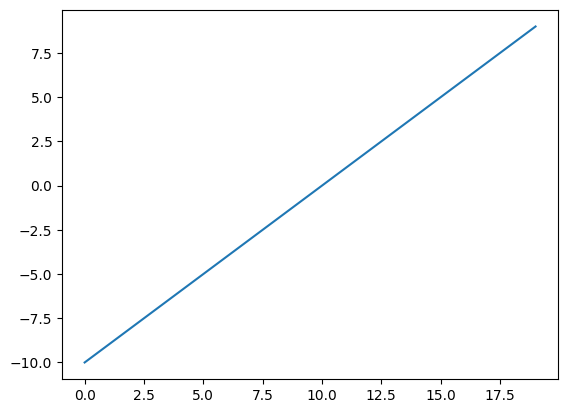

In [ ]:
# Visualize our toy tensor
plt.plot(A)

In [ ]:
# Replicating Sigmoid

def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Using the sigmoid function on the toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

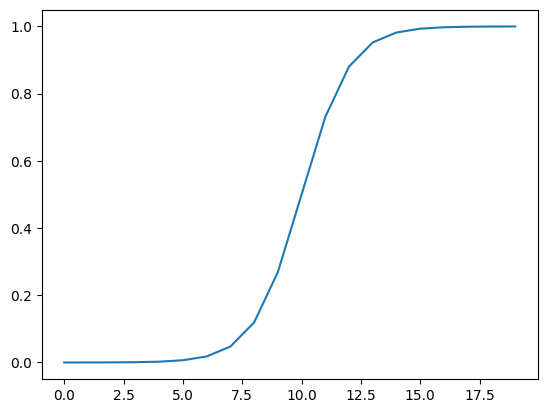

In [ ]:
# Plot the toy tensor transformed to sigmoid
plt.plot(sigmoid(A))

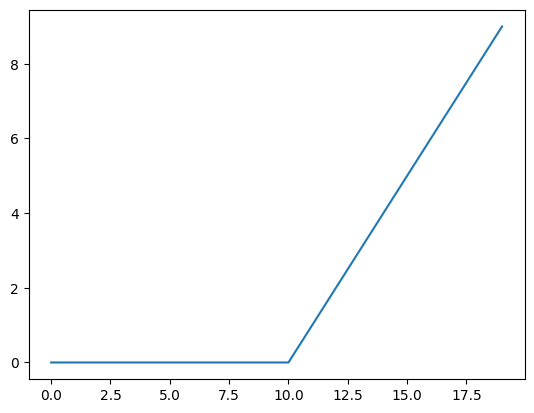

In [ ]:
# Replicating the relu activation function
def relu(y):
  return tf.maximum(0, y)

# Using the relu function on the toy tensor
relu(A)

# Plot the toy tensor transformed to relu
plt.plot(relu(A))

## Evaluating and Improving the Classification Model

In [ ]:
# Number of examples we have
len(X)

1000

In [ ]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Recreating the model to fit the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_9.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6901 - accuracy: 0.5175
Epoch 2/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6759 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6555 - accuracy: 0.6538
Epoch 4/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6179 - accuracy: 0.7675
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7800
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4661 - accuracy: 0.9125
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.3556 - accuracy: 0.9700
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.2543 - accuracy: 0.9737
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.1805 - accuracy: 0.9900
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.1243 - accuracy: 0.9975
Epoch 11/25
25/25 [

In [ ]:
# Evaluate the model on the test dataset
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0153 - accuracy: 1.0000


[0.015298842452466488, 1.0]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


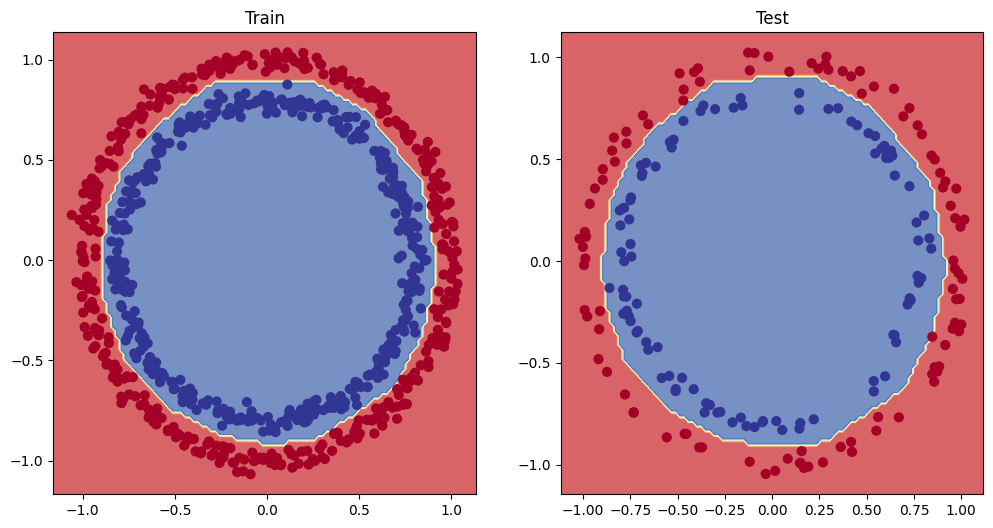

In [ ]:
# Plotting the decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model_9, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model=model_9, X=X_test, y=y_test)
plt.show();

## Plot the loss (training) curve

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.690106,0.51750
1,0.675886,0.55250
2,0.655540,0.65375
3,0.617864,0.76750
4,0.562312,0.78000
5,0.466120,0.91250
6,0.355647,0.97000
7,0.254268,0.97375
8,0.180539,0.99000
9,0.124340,0.99750


Text(0.5, 1.0, 'Model_9 loss curves')

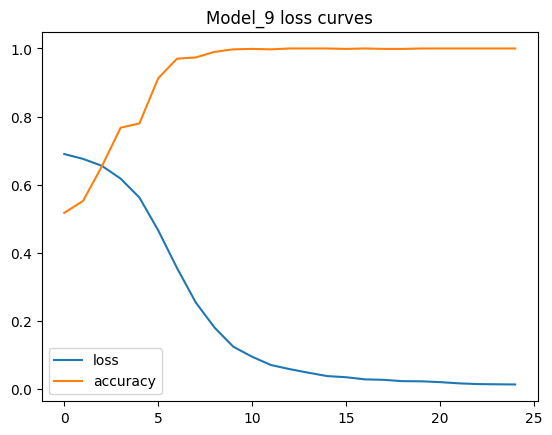

In [ ]:
# Plot the loss curve
pd.DataFrame(history.history).plot()
plt.title("Model_9 loss curves")

## Findding the best Learning Rate

To find the ideal learning rate, we will use the following steps:
1. A learning rate **callback** - an extra piece of functionality to add to the model while its training
2. Another model - same as the one above
3. A modified loss curves plot.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_9)
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))

# Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.6924 - accuracy: 0.4975 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.4950 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.4950 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5075 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.5075 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.5050 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

<Axes: xlabel='epochs'>

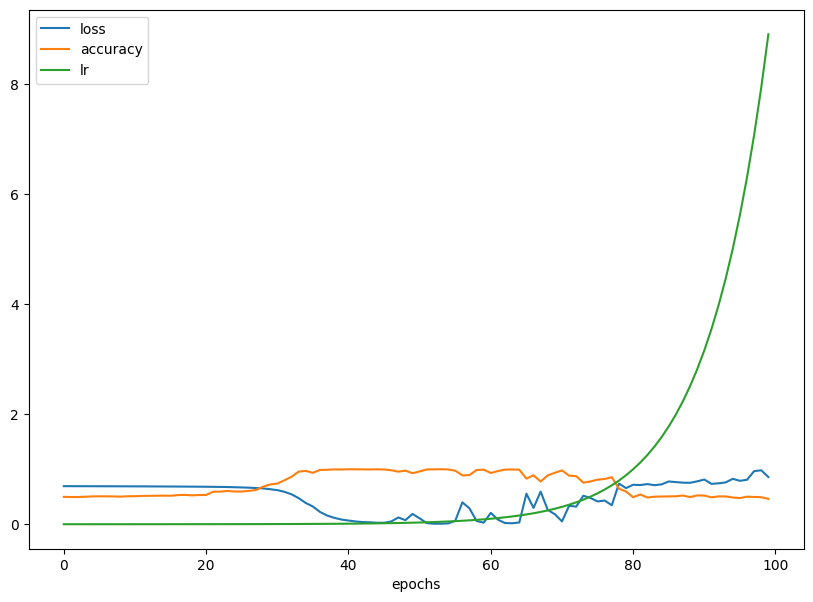

In [ ]:
# Check the history
pd.DataFrame(history_10.history).plot(figsize=(10, 7), xlabel="epochs")

In [ ]:
# plot the learning rate vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'Leaning Rate vs Loss')

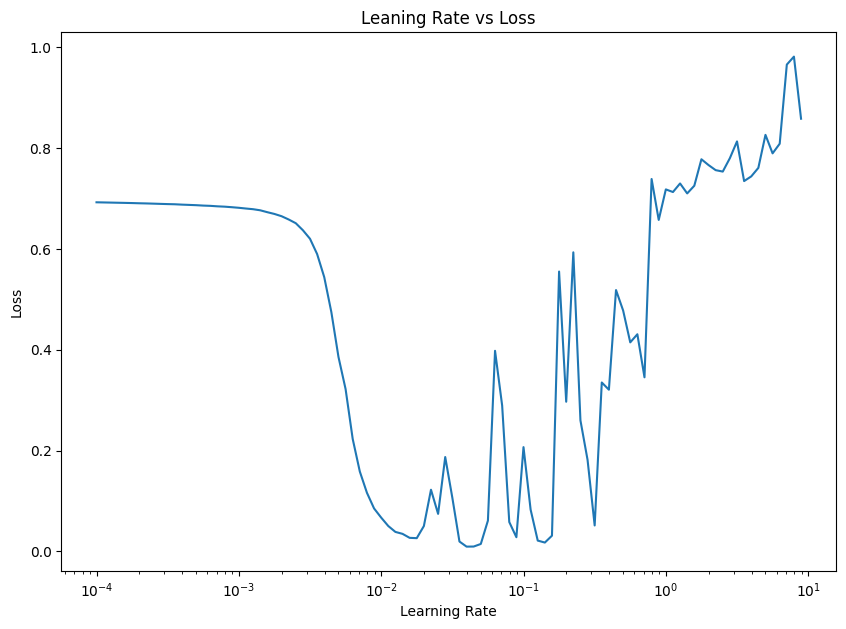

In [ ]:
# plot the learning rate vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_10.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Leaning Rate vs Loss")

In [ ]:
# Trying a to create a new model with higher learning rate on the same model as before

# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_9)
model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_11.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(X_train, y_train, epochs=15)

Epoch 1/15
25/25 [==============================] - 1s 3ms/step - loss: 0.6837 - accuracy: 0.5612
Epoch 2/15
25/25 [==============================] - 0s 3ms/step - loss: 0.6490 - accuracy: 0.6062
Epoch 3/15
25/25 [==============================] - 0s 3ms/step - loss: 0.5632 - accuracy: 0.8813
Epoch 4/15
25/25 [==============================] - 0s 3ms/step - loss: 0.4067 - accuracy: 0.9475
Epoch 5/15
25/25 [==============================] - 0s 3ms/step - loss: 0.2157 - accuracy: 0.9775
Epoch 6/15
25/25 [==============================] - 0s 3ms/step - loss: 0.1193 - accuracy: 0.9912
Epoch 7/15
25/25 [==============================] - 0s 3ms/step - loss: 0.0655 - accuracy: 0.9937
Epoch 8/15
25/25 [==============================] - 0s 3ms/step - loss: 0.0446 - accuracy: 0.9987
Epoch 9/15
25/25 [==============================] - 0s 3ms/step - loss: 0.0355 - accuracy: 0.9975
Epoch 10/15
25/25 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9987
Epoch 11/15
25/25 [

In [ ]:
# Evaluate model 11 on test data set
model_11.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9850


[0.0348845012485981, 0.9850000143051147]

In [ ]:
# Evaluate model 11 on test data set
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0153 - accuracy: 1.0000


[0.015298842452466488, 1.0]

313/313 [==============================] - 1s 1ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


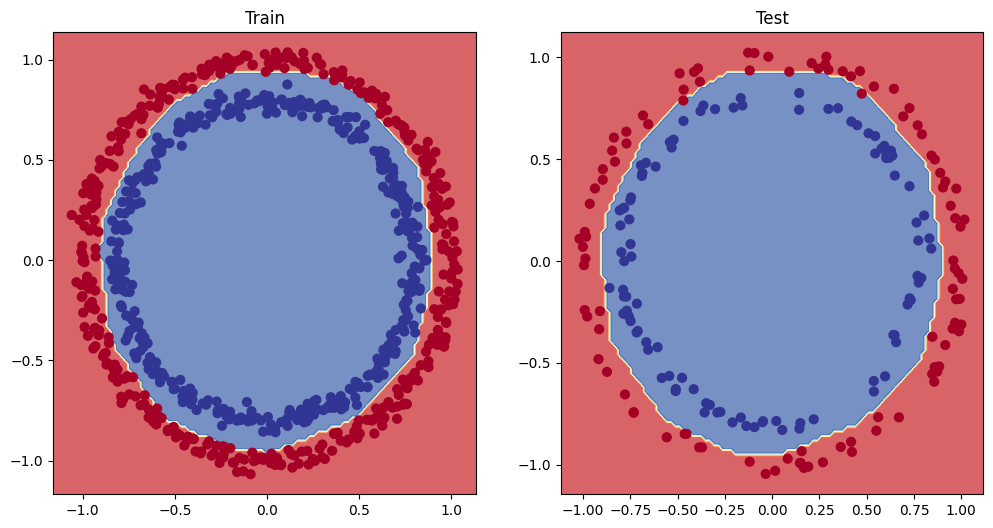

In [ ]:
# Plotting the decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model_11, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model=model_11, X=X_test, y=y_test)
plt.show();

## More classification evaluation methods

Alongside visualizing the models results as much as possible, there are handful of other classification evaluation methods:
1. Accuracy
2. Precision
3. Recall
4. F1-Score
5. Confusion Matrix
6. Classification report (SciKit Learn)

### Accuracy

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_11.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 5ms/step - loss: 0.0349 - accuracy: 0.9850
Model loss on the test set: 0.0348845012485981
Model accuracy on the test set: 98.50%


### Confusion Matrix


In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make some predictions
y_preds = model_11.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

7/7 [==============================] - 0s 2ms/step


array([[98,  3],
       [ 0, 99]])

In [ ]:
# Prediciton - y_preds are in prediction probabilty form - the standard output from sigmoid activation functions.

# Convert the prediction probabilities into binary format and view
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

### Prettify the confusion matrix

In [ ]:
# Plot confusion matrix plotting function

import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_preds, classes=None, figsize=(7, 7), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_test, tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.RdBu)
  fig.colorbar(cax)

  # Set labels
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Labelling the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust the label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="yellow" if cm[i, j] > threshold else "black",
            size=text_size)

In [ ]:
plot_confusion_matrix(y_test=y_test, y_preds=y_preds)

ValueError: ignored

# Multi-Class Classification

When there are more than 2 classes, it becomes the multi class classification

For the practice, we will classify images of different items of clothing

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# the data has already been sorted into training and test datasets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
# Show the first traingin example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of the single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

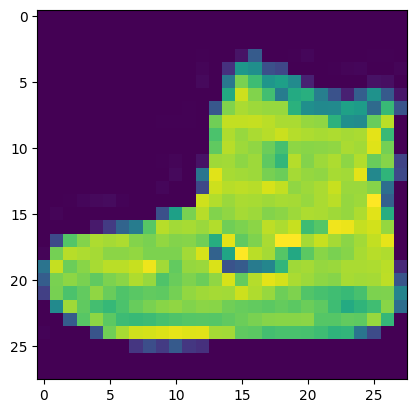

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [ ]:
# Create a small list so we can index into our training labels so they are human readable

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

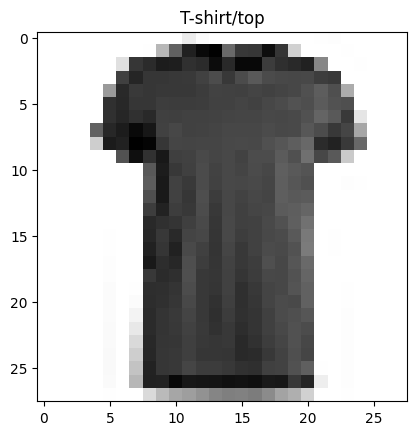

In [ ]:
# Plot an example image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

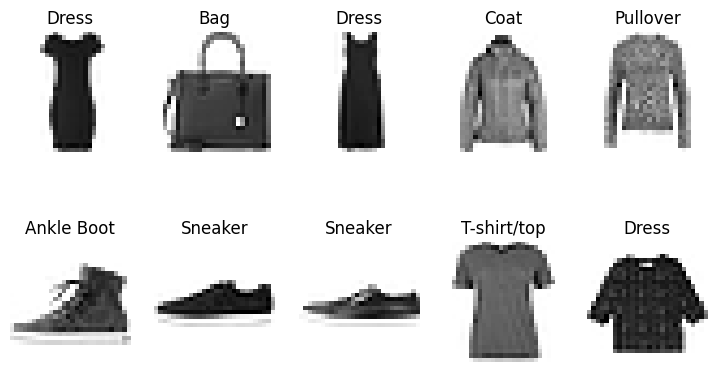

In [ ]:
# Plot multiple random images of fashion MNIST

import random
plt.figure(figsize=(9, 5))
for i in range(10):
  ax = plt.subplot(2, 5, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi class classification model

Multi class classification has same architecture as Binary classification but we have to tweak a few things as:
1. Input Shape - 28 X 28 (shape of one image)
2. Output Shape - 10 (One per class/clothing)
3. Loss function - tf.keras.losses.CategoricalCrossEntropy()
4. Output layer activeation. - Softmax (not Sigmoid)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_12.fit(train_data,
                                train_labels, # Can be replaced by - tf.one_hot(train_labels, depth=10) to use CategoricalCrossentropy()
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training
                                              # Can be replaced by - tf.one_hot(test_labels, depth=10) to use CategoricalCrossentropy()

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.5963 - accuracy: 0.0995 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3037 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [ ]:
# Model 12 Summary
model_12.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 4)                 3140      
                                                                 
 dense_29 (Dense)            (None, 4)                 20        
                                                                 
 dense_30 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Min and Max value of train_data
train_data.min(), train_data.max()

(0, 255)

Neural Networks prefer the data to be Scaled/Normalised, this means the numbers in the tensors must be between 0 & 1

In [ ]:
# We can get our training and testing data between - 0 and 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max value of the scaled training data
train_data_norm.min(), train_data_norm.max(),

(0.0, 1.0)

In [ ]:
# Changing the Model 12 data to normalised data

# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_13.fit(train_data_norm,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data_norm, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2804 - accuracy: 0.5177 - val_loss: 0.9270 - val_accuracy: 0.6629
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7939 - accuracy: 0.7134 - val_loss: 0.7604 - val_accuracy: 0.7206
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6792 - accuracy: 0.7509 - val_loss: 0.6881 - val_accuracy: 0.7405
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6347 - accuracy: 0.7634 - val_loss: 0.6536 - val_accuracy: 0.7513
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6030 - accuracy: 0.7810 - val_loss: 0.6386 - val_accuracy: 0.7681
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5753 - accuracy: 0.7964 - val_loss: 0.6025 - val_accuracy: 0.7835
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5592 - accuracy: 0.8050 - val_loss: 0.5954 - val_accuracy:

<Axes: title={'center': 'Normalised Data'}>

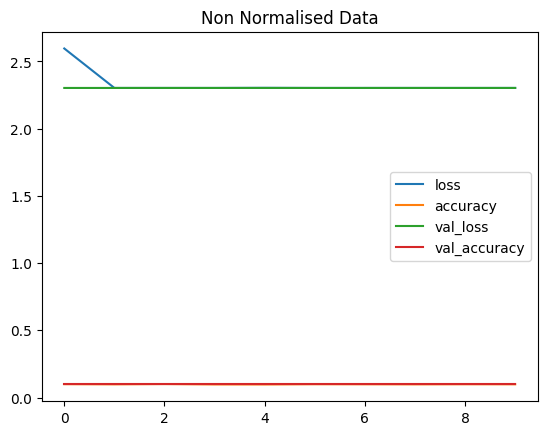

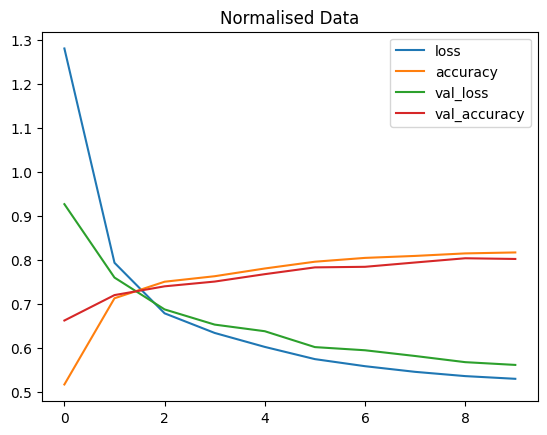

In [ ]:
# Plotting the normalised and non-normalised history curve

import pandas as pd

pd.DataFrame(non_norm_history.history).plot(title="Non Normalised Data")
pd.DataFrame(norm_history.history).plot(title="Normalised Data")

### Finding the ideal learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Introducing the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))

# Fit the model
lr_history = model_14.fit(train_data_norm,
                                train_labels,
                                epochs=40,
                                validation_data=(test_data_norm, test_labels),
                                callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2131 - accuracy: 0.5031 - val_loss: 0.8190 - val_accuracy: 0.6984 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7369 - accuracy: 0.7267 - val_loss: 0.7233 - val_accuracy: 0.7446 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6718 - accuracy: 0.7522 - val_loss: 0.6826 - val_accuracy: 0.7311 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6421 - accuracy: 0.7643 - val_loss: 0.6542 - val_accuracy: 0.7428 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6253 - accuracy: 0.7711 - val_loss: 0.6484 - val_accuracy: 0.7710 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6128 - accuracy: 0.7745 - val_loss: 0.6449 - val_accuracy: 0.7607 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 7s

Text(0.5, 1.0, 'Finding the ideal Learning rate')

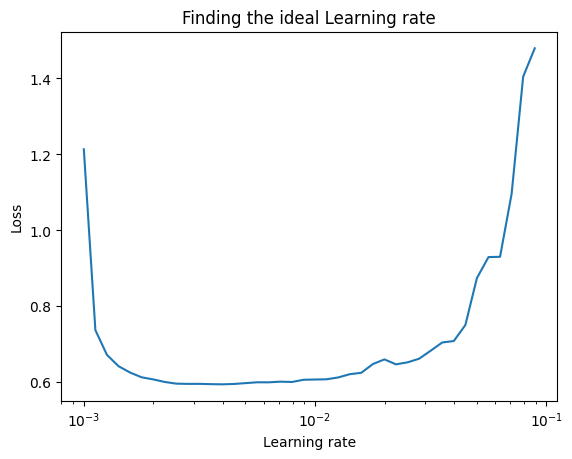

In [ ]:
# Plot the learning rate decay curve

import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal Learning rate")

In [ ]:
# Refitting the model with ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create the model
model_15 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_15.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Fit the model
history_15 = model_15.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2241 - accuracy: 0.5373 - val_loss: 0.8518 - val_accuracy: 0.6920
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7697 - accuracy: 0.7306 - val_loss: 0.7369 - val_accuracy: 0.7458
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6838 - accuracy: 0.7629 - val_loss: 0.6806 - val_accuracy: 0.7654
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6425 - accuracy: 0.7747 - val_loss: 0.6704 - val_accuracy: 0.7701
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6205 - accuracy: 0.7807 - val_loss: 0.6352 - val_accuracy: 0.7839
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6062 - accuracy: 0.7858 - val_loss: 0.6448 - val_accuracy: 0.7746
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5965 - accuracy: 0.7887 - val_loss: 0.6155 - val_accuracy:

## Evaluating the multi class Classification Model

313/313 [==============================] - 1s 3ms/step


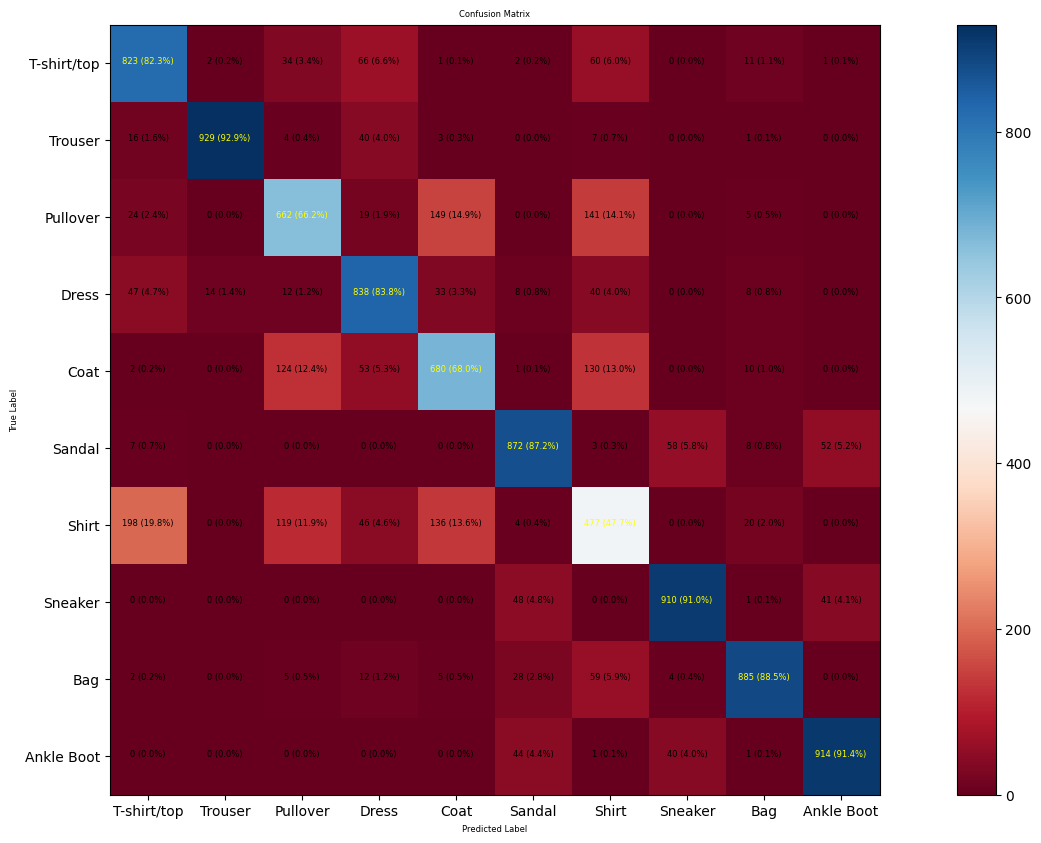

In [ ]:
# Create a confusion matrix

# make predictions with the model
y_probs = model_15.predict(test_data_norm)

# convert all the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

plot_confusion_matrix(y_test=test_labels,
                      y_preds=y_preds,
                      classes=class_names,
                      figsize=(20, 10),
                      text_size=6)

Fun Little Function:

1. Plot a random image
2. Make prediction on said image
3. Label the plot with truth label and the predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label
  """

  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on: If the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

1/1 [==============================] - 0s 21ms/step


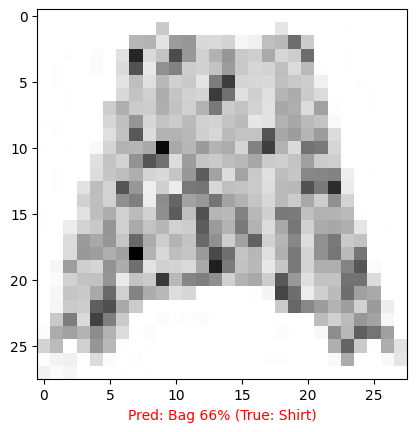

In [ ]:
# Check the random image as well as its prediction
plot_random_image(model=model_15,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

## What pattern is our model learning?

In [ ]:
# Finding the layers of our most recent model
model_15.layers

In [ ]:
# Extract a particular layer
model_15.layers[1]

In [ ]:
# Get the patterns of the layer in our network
weights, biases = model_15.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[-0.10357173,  0.05052535, -0.4330336 ,  0.11154387],
        [ 0.4276683 , -0.04290041, -0.53371173,  0.34176305],
        [ 0.924595  ,  0.06959943, -0.99423385,  0.71799976],
        ...,
        [-0.02093532, -0.03794621, -0.40544683, -0.06243128],
        [ 0.18591028, -0.04830295, -0.23112926, -0.44843355],
        [-0.01055076, -0.08652159, -0.15634109,  0.30244344]],
       dtype=float32),
 (784, 4))